<a href="https://colab.research.google.com/github/BrunoASNascimento/nlp_study/blob/develop/pln_ufabc/PLN_Atividade_Pr%C3%A1tica_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 3
## Classificação de Textos ou Análise de Sentimentos

#### **None:** Bruno Araújo Santos do Nascimento
#### **RA:** 11201720606

Esse trabalho consiste em fazer o treinameto de um modelo NLP, com o intuito de verificar se a clasificação de determinado filme foi positiva ou negativa.

Os dados utilizados foram do IMDB, traduzidos para português-brasileiro.


- **Fonte**: https://www.kaggle.com/luisfredgs/imdb-ptbr

- **Google Driver**: https://drive.google.com/file/d/1-17mMeWcwtzp3XAB5CN9QKLOr54a8F-K/view?usp=sharing

- **Video**: https://youtu.be/S_LvggNL1ug

## Intalações

Campo para fazer as instações de bibliotecas que não existem por padrão no Colab.

In [2]:
!pip install unidecode

     |████████████████████████████████| 235 kB 5.4 MB/s 


## Importações de bibliotecas

In [3]:
from string import punctuation
import unidecode
import pandas as pd
# Charts
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# NLTK
import nltk
from nltk import tokenize
from nltk import ngrams
# Sklearn
import sklearn.model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Downloads - NLTK

Campo necessário para fazer o download de dependências do NLTK.

In [44]:
nltk.download('rslp')
nltk.download('stopwords')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importação dos dados

In [7]:
df_data = pd.read_csv('/content/drive/MyDrive/data/imdb-reviews-pt-br.csv.zip')
df_data.sample(5)


,id,text_en,text_pt,sentiment
2417,2419,This was the next to last film appearance by J...,Este foi o próximo a última aparição no cinema...,neg


In [73]:
data_size = df_data.shape
print(f"O dataset tem {data_size[0]} linhas e  {data_size[1]} colunas.")

O dataset tem 49459 linhas e  6 colunas


## Verificação inicial

Abaixo foi feita a verificação de proporção dos dados. Como os dados estão bem balanceados, quase tendo 50% para negativos e positivos, não se faz necessário efetuar um pré processamento para ajustar essa proporção.

In [8]:
df_data["sentiment"].value_counts(normalize=True)


neg    0.500718
pos    0.499282
Name: sentiment, dtype: float64

## Criação de campo numérico

Como será necessário transformar string em numero para o treinamento, então é feita a substituição abaixo.

In [9]:
df_data["sentiment_int"] = df_data["sentiment"].replace({"pos": 1, "neg": 0})
df_data.sample(5)

,id,text_en,text_pt,sentiment,sentiment_int
11303,11305,Ive been trying to write a plot summary for se...,Eu tenho tentado escrever um resumo do enredo ...,neg,0
11964,11966,Im a fan of the 1950s original and about 20 mi...,Eu sou um fã da década de 1950 original e cerc...,neg,0
27541,27543,Okay.. this wasnt the worst movie Ive ever see...,"Ok .. este não era o pior filme que eu já vi, ...",neg,0
38692,38694,"Despite the patronage of George Lucas, this ca...","Apesar do patrocínio de George Lucas, essa fan...",pos,1
9890,9892,This is one of the most awful movies Ive had t...,Este é um dos filmes mais terríveis que tive a...,neg,0


## Bag of words

Teste utilizando o metodo "Bag of words", com ele temos uma matriz com as palavras e o numero de vezes que elas aparecem, para reduzir o tempo de treinamento, foram usadas só 50 palavras.

In [10]:
# CountVector
vectorization = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorization.fit_transform(df_data["text_pt"])
bag_of_words.shape


(49459, 50)

### Separando dataset

In [76]:
train, test, y_train, y_test = ms.train_test_split(
    bag_of_words,
     df_data["sentiment_int"], 
     random_state=42
    )


### Treinando

Para o treinamento do modelo, foi usado a regressão logistica, modelo mais recomendado para esse tipo de treinamento.

In [77]:
reg = LogisticRegression()
reg.fit(train, y_train)
acuracy = reg.score(test, y_test)
print(f"A acurácia foi de {acuracy*100:.1f}%")


A acurácia foi de 65.8%


## Criação de função para treinamento

Essa função prepara o dado para o treinamento e faz o print da acurácia.

In [78]:
def classification_text(df, column_text, column_sentiment):
    vectorization = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorization.fit_transform(df[column_text])
    train, test, y_train, y_test = ms.train_test_split(
        bag_of_words,
         df[column_sentiment],
          random_state=42
    )
    
    reg = LogisticRegression()
    reg.fit(train, y_train)
    acuracy = reg.score(test, y_test)

    print(f"A acurácia foi de {acuracy*100:.1f}%")

    return 


In [79]:
classification_text(df_data, "text_pt", "sentiment_int") # Teste para verificar se a função retorna o mesmo valor do treinamento anterior.

A acurácia foi de 65.8%


## Word cloud

Criação da função e do dado com todas as palavras para gerar a nuvem de palavras para auxiliar na estratégia de limpeza dos dados.


In [15]:
all_words = ' '.join([text for text in df_data["text_pt"]])

In [82]:
def plot_word_cloud(text, title):
    word_cloud = WordCloud(
        width=800,
        height=500,
        max_font_size=110,
        collocations=False
    ).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.title(title, fontdict={"fontsize": 24, "color": "black"})
    plt.axis("off")
    plt.show()
    plt.close()


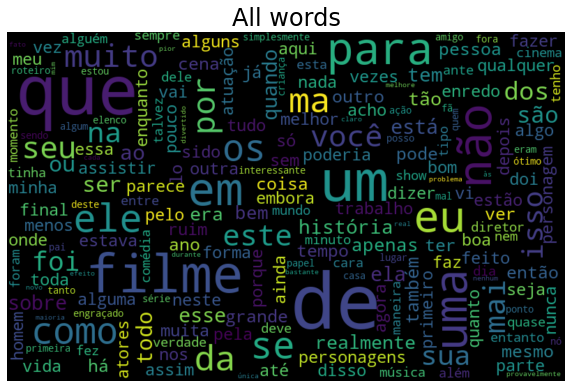

In [31]:
plot_word_cloud(all_words, "All words")


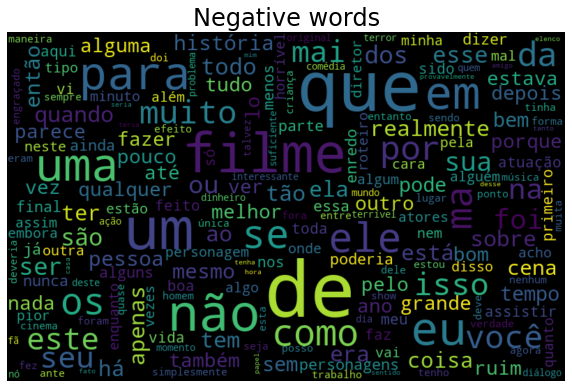

In [32]:
all_words_neg = ' '.join(
    [text for text in df_data.loc[df_data["sentiment_int"]==0]["text_pt"]])
plot_word_cloud(all_words_neg, "Negative words")


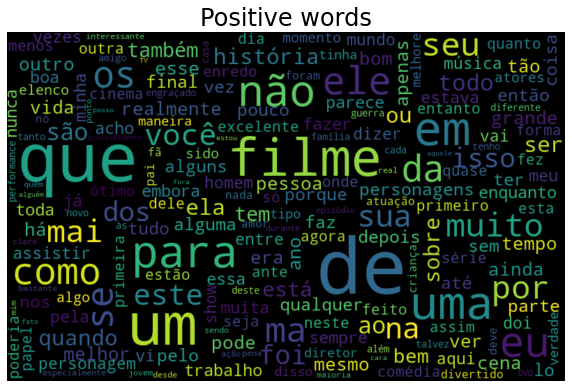

In [33]:
all_words_pos = ' '.join(
    [text for text in df_data.loc[df_data["sentiment_int"] == 1]["text_pt"]])
plot_word_cloud(all_words_pos, "Positive words")


## Tokenização das palavras

Verificação da frequncia de cada bloco de texto separo por um espaço.

In [34]:
tokenize_whitespace = tokenize.WhitespaceTokenizer()
tokenize_all_words = tokenize_whitespace.tokenize(all_words)
freq = nltk.FreqDist(tokenize_all_words)

In [35]:
df_freq = pd.DataFrame({"word":freq.keys(), "freq":freq.values()})
df_freq.nlargest(columns="freq", n=10)


,word,freq
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


## Pareto

Gráfico usado para visualizar a distribuição das palavras de uma maneira mais amigável.

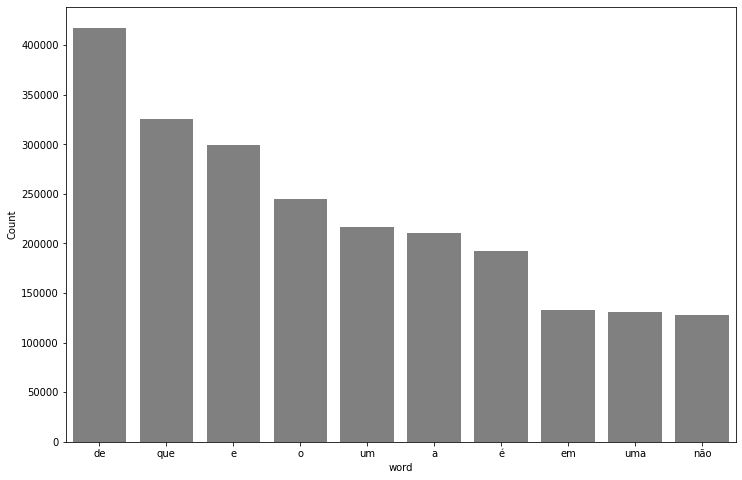

In [36]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=df_freq.nlargest(columns="freq", n=10),
    x="word",
    y="freq",
    color="gray"
)
ax.set(ylabel="Count")
plt.show()


### Criação da função para o plot do gráfico pareto

In [37]:
def plot_freq_dist(df, column_filter, title, n=10):
    analyzed_words = ' '.join(
        [text for text in df[column_filter]]
    )

    tokenize_whitespace = tokenize.WhitespaceTokenizer()
    tokenize_all_words = tokenize_whitespace.tokenize(analyzed_words)
    freq = nltk.FreqDist(tokenize_all_words)
    df_freq = pd.DataFrame({"word": freq.keys(), "freq": freq.values()})
    df_freq = df_freq.nlargest(columns="freq", n=n)
    df_freq["freq_normalize_accumulated"] = (
        100 * df_freq["freq"].cumsum()/df_freq["freq"].sum())

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        data=df_freq,
        x="word",
        y="freq",
        color="gray"
    )
    ax2 = ax.twinx()
    sns.lineplot(data=df_freq, x='word', y='freq_normalize_accumulated',
                 color='red', sort=False, ax=ax2)
    ax.set(ylabel="Count")
    plt.title(title, fontdict={"fontsize": 24, "color": "black"})
    plt.show()
    plt.close()


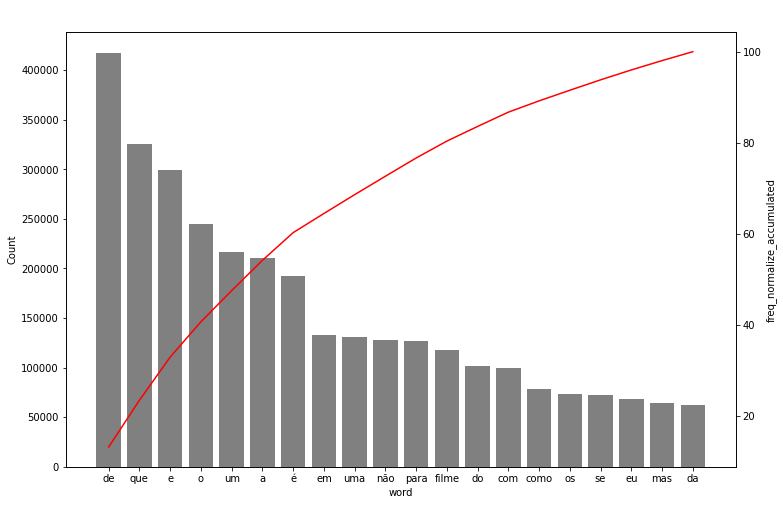

In [38]:
plot_freq_dist(df_data,  "text_pt", "All words", n=20)


## Crição das funções de limpeza do texto

### Remoção de acentos

In [39]:
def remove_accents(text):
    return unidecode.unidecode(text)

### Remoção das StopWords

**Stop words:** Palavras que não trazem uma informação relevante para o problema, como por exemplo "de", "a", "ou" etc.

In [40]:
def remove_stop_words(text):
    stop_words = list(
        dict.fromkeys(
            nltk.corpus.stopwords.words("portuguese") +
            [remove_accents(word) for word in nltk.corpus.stopwords.words("portuguese")]
        )
    )
    tokenize_whitespace = tokenize.WhitespaceTokenizer()
    tokenize_all_words = tokenize_whitespace.tokenize(text)
    return " ".join([word for word in tokenize_all_words if word not in stop_words])


### Remoção de acentos

In [41]:
def remove_punctuation(text):
    tokenize_punctuation = tokenize.WordPunctTokenizer()
    tokenize_all_words = tokenize_punctuation.tokenize(text)
    return " ".join([word for word in tokenize_all_words if word not in punctuation])
   

### Tratamento de radicais das palavras

In [ ]:
stemmer = nltk.stem.RSLPStemmer()

def stemming(text):
    tokenize_whitespace = tokenize.WhitespaceTokenizer()
    tokenize_all_words = tokenize_whitespace.tokenize(text)
    return " ".join([stemmer.stem(word) for word in tokenize_all_words])

## Limpeza dos dados

Faz o uso das funções listadas acima, para fazer o processamento do texto e deixa-lo mais normalizado.

In [45]:
df_data["text_processed"] = df_data["text_pt"].apply(remove_accents).str.lower()
df_data["text_processed"] = df_data["text_processed"].apply(remove_stop_words)
df_data["text_processed"] = df_data["text_processed"].apply(remove_punctuation)
df_data["text_processed"] = df_data["text_processed"].apply(stemming)
df_data.head(10)

,id,text_en,text_pt,sentiment,sentiment_int,text_processed
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,film fot lata palavr apropri ele verdad tant o...
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg,0,cois engrac acontec comig enquant assist mosqu...
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,neg,0,film terr alema ser estranh vi cient qualqu co...
7,8,"Being a long-time fan of Japanese film, I expe...","Sendo um fã de longa data do cinema japonês, e...",neg,0,send fa long dat cinem japon esper iss real po...
8,9,"""Tokyo Eyes"" tells of a 17 year old Japanese g...","""Tokyo Eyes"" fala de uma menina japonesa de 17...",neg,0,toky eye fal menin japon 17 ano cai hom send c...
9,10,Wealthy horse ranchers in Buenos Aires have a ...,Fazendeiros ricos em Buenos Aires têm uma long...,neg,0,fazend ric buen air long poli nao comerci craw...


In [80]:
classification_text(df_data, "text_processed", "sentiment_int")

A acurácia foi de 69.7%


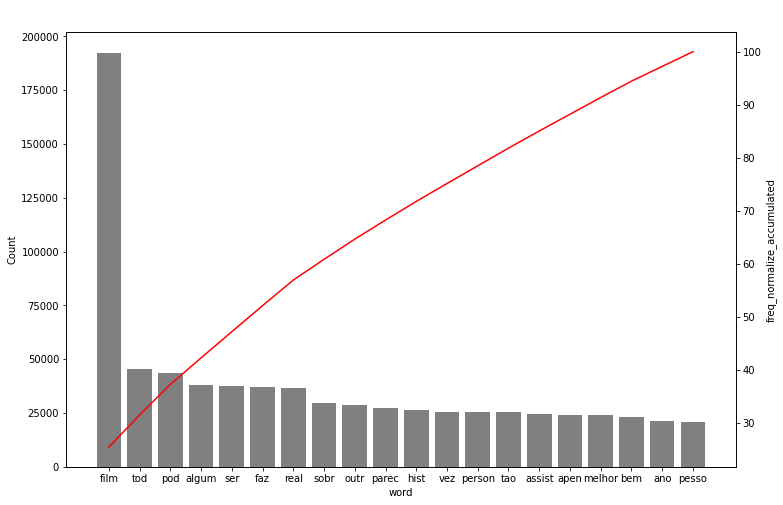

In [81]:
plot_freq_dist(df_data,  "text_processed", "All words processed", n=20)

## Verificando a nuvem de palavras

Aqui podemos perceber que algumas palavras começaram a aparecer, como "ruim" para negativas e "bom" para positivas.

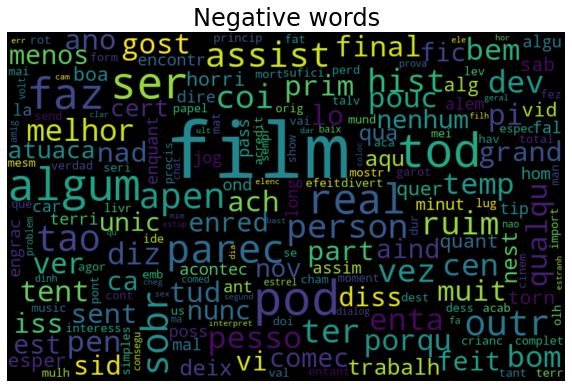

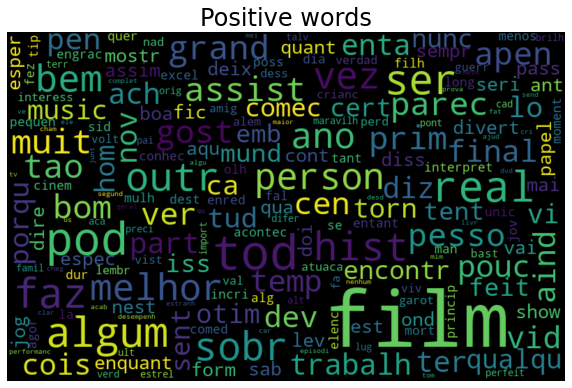

In [48]:
all_words_neg = ' '.join(
    [text for text in df_data.loc[df_data["sentiment_int"] == 0]["text_processed"]])
plot_word_cloud(all_words_neg, "Negative words")

all_words_pos = ' '.join(
    [text for text in df_data.loc[df_data["sentiment_int"] == 1]["text_processed"]])
plot_word_cloud(all_words_pos, "Positive words")

## TF-IDF (Term Frequency — Inverse Document Frequency)

Com o intuito de melhorar o modelo utilizando o TF-IDF, que coloca um peso maior nas palavras que podem diferenciar uma expressão de outra. Como por exemplo:

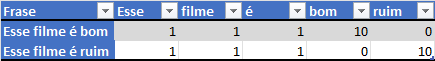

Os valores são aleatórios, mas a ideia central é que para as palavras semelhantes entre as frases, tem um peso menor do que aquelas que diferenciam as frases.


### TF-IDF (50 palavras)

TF-IDF utilizado na base limpa, mas com apenas 50 palavras.

In [83]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
tfidf_words = tfidf.fit_transform(df_data["text_processed"])
train, test, y_train, y_test = ms.train_test_split(
    tfidf_words, df_data["sentiment_int"], random_state=42)
reg.fit(train, y_train)
acuracy = reg.score(test, y_test)
print(f"A acurácia foi de {acuracy*100:.1f}%")


A acurácia foi de 69.7%


### TF-IDF (utilizando ngrams)

TF-IDF utilizado na base limpa, mas utilizando o ngrams.

In [84]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
tfidf_words = tfidf.fit_transform(df_data["text_processed"])
train, test, y_train, y_test = ms.train_test_split(
    tfidf_words, df_data["sentiment_int"], random_state=42)
reg.fit(train, y_train)
acuracy = reg.score(test, y_test)
print(f"A acurácia foi de {acuracy*100:.1f}%")


A acurácia foi de 88.6%


# Conclusão

Com a base do IMDB em português, foi possivel criar um modelo utilizando a regressão logistica e alguns pré processamentos, que nos deu quase 90% de acurácia, ao dizer se um comentário é negativo ou positivo para determinado filme.